<a href="https://colab.research.google.com/github/takhtardeshirsoheib/soheib/blob/master/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
trainAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")

In [ ]:
path_train_covid = '/content/drive/MyDrive/covid/train/'
path_train_normal = '/content/drive/MyDrive/covid/train-n/'
path_test_covid = '/content/drive/MyDrive/covid/test/'
path_test_normal = '/content/drive/MyDrive/covid/test-n/'

In [ ]:
import os
train_covid_case = os.listdir(path_train_covid)
train_normal_case = os.listdir(path_train_normal)
test_covid_case = os.listdir(path_test_covid)
test_normal_case = os.listdir(path_test_normal)

covid_case = [(path_train_covid + train_covid_case[i],1) for i in range(150)]
normal_case = [(path_train_normal + train_normal_case[i],0) for i in range(165)]

covid_case_t = [(path_test_covid + test_covid_case[i],1) for i in range(46)]
normal_case_t = [(path_test_normal + test_normal_case[i],0) for i in range(51)]
print(len(train_covid_case),len(train_normal_case),len(test_covid_case),len(test_normal_case))

150 165 46 51


In [ ]:
import random
train = covid_case + normal_case
test = covid_case_t + normal_case_t
random.shuffle(train)
random.shuffle(test)
print(train)

[('/content/drive/MyDrive/covid/train-n/NORMAL2-IM-0947-0001.jpeg', 0), ('/content/drive/MyDrive/covid/train-n/NORMAL2-IM-0832-0001-0002.jpeg', 0), ('/content/drive/MyDrive/covid/train-n/IM-0141-0001.jpeg', 0), ('/content/drive/MyDrive/covid/train-n/NORMAL2-IM-0630-0001.jpeg', 0), ('/content/drive/MyDrive/covid/train-n/IM-0697-0001.jpeg', 0), ('/content/drive/MyDrive/covid/train/7-fatal-covid19.jpg', 1), ('/content/drive/MyDrive/covid/train/covid-19-pneumonia-44-day-0.jpeg', 1), ('/content/drive/MyDrive/covid/train-n/NORMAL2-IM-0500-0001.jpeg', 0), ('/content/drive/MyDrive/covid/train/covid-19-pneumonia-93.png', 1), ('/content/drive/MyDrive/covid/train/7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg', 1), ('/content/drive/MyDrive/covid/train/covid-19-pneumonia-7-PA.jpg', 1), ('/content/drive/MyDrive/covid/train/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3a.png', 1), ('/content/drive/MyDrive/covid/train/covid-19-pneumonia-rapidly-progressive-admission.jpg', 1), ('/content/drive/MyD

In [ ]:
import numpy as np
W=224
H=224
x_train = np.zeros((315,W,H,3))
y_train = []
x_test = np.zeros((97,W,H,3))
y_test = []

In [ ]:
import random
import cv2
from tqdm import tqdm
for i in tqdm(range(len(train))):
  adr , label = train[i]
  Image=cv2.imread(adr)
  Image=cv2.resize(Image,(W,H))
  Image=Image/127.5 - 1
  x_train[i]=Image
  y_train.append(label)
y_train=np.array(y_train)



for i in tqdm(range(len(test))):
  adr , label = test[i]
  Image=cv2.imread(adr)
  Image=cv2.resize(Image,(W,H))
  Image=Image/127.5 - 1
  x_test[i]=Image
  y_test.append(label)
y_test=np.array(y_test)

print(y_test)

100%|██████████| 97/97 [00:40<00:00,  2.41it/s]

[0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0
 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1]


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

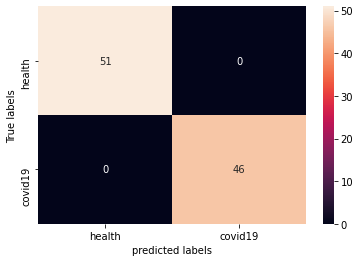

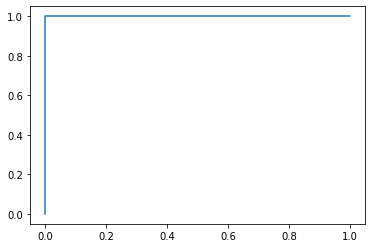

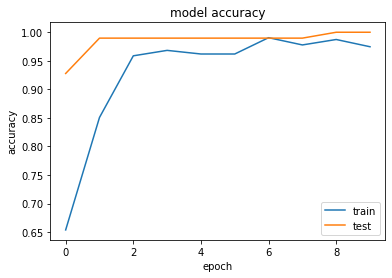

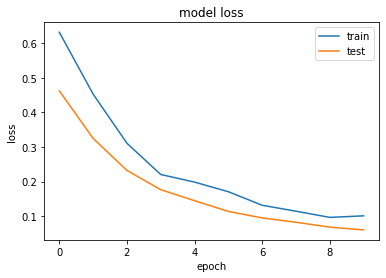

In [ ]:
from tensorflow.keras.applications import VGG16
baseModel = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in baseModel.layers:
  layer.trainable = False

import tensorflow as tf

headModel = tf.keras.layers.GlobalAveragePooling2D()(baseModel.output)
headModel = tf.keras.layers.Dense(64, activation="relu")(headModel)
headModel = tf.keras.layers.Dropout(0.5)(headModel)
headModel = tf.keras.layers.Dense(1, activation="sigmoid")(headModel)
model = tf.keras.models.Model(inputs=baseModel.input, outputs=headModel)
model.summary()

EPOCHS = 10
BS = 16
monitor= tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-3, patience=2,restore_best_weights=True)
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
hist1=model.fit(x=x_train,y=y_train,batch_size=BS,epochs=EPOCHS,validation_data=(x_test,y_test),callbacks=[monitor])

import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

Y_pred= model.predict(x_test)
Y_pred_list=[]
for i in range(len(Y_pred)):
  if Y_pred[i,0]>0.5:
    Y_pred_list.append(1)
  else:
    Y_pred_list.append(0)
Y_true_list= list(y_test)
CM = metrics.confusion_matrix(Y_true_list,Y_pred_list)
ax = plt.subplot()
sns.heatmap(CM, annot=True ,ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['health','covid19'])
ax.yaxis.set_ticklabels(['health','covid19'])
#plt.figure()
#plt.imshow(CM,interpolation='nearest',cmap=plt.cm.Blues)

from sklearn.metrics import roc_curve,auc
FP , TP , th =roc_curve(Y_true_list,Y_pred)
ROC_Area = auc(FP,TP)

plt.figure()
plt.plot(FP,TP,)

plt.figure()
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')

plt.figure()
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')

80142336/80134624 [==============================] - 0s 0us/step
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

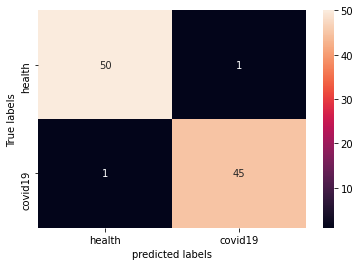

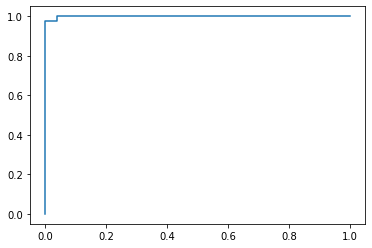

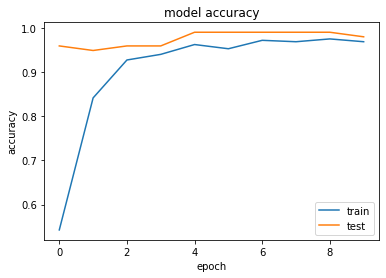

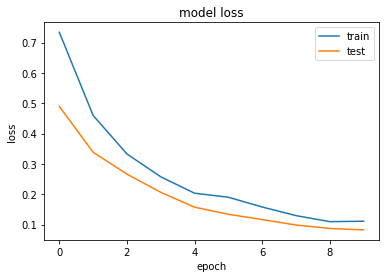

In [ ]:
from tensorflow.keras.applications import VGG19
baseModel = VGG19(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in baseModel.layers:
  layer.trainable = False

import tensorflow as tf

headModel = tf.keras.layers.GlobalAveragePooling2D()(baseModel.output)
headModel = tf.keras.layers.Dense(64, activation="relu")(headModel)
headModel = tf.keras.layers.Dropout(0.5)(headModel)
headModel = tf.keras.layers.Dense(1, activation="sigmoid")(headModel)
model = tf.keras.models.Model(inputs=baseModel.input, outputs=headModel)
model.summary()

EPOCHS = 10
BS = 16
monitor= tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-3, patience=2,restore_best_weights=True)
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
hist2=model.fit(x=x_train,y=y_train,batch_size=BS,epochs=EPOCHS,validation_data=(x_test,y_test),callbacks=[monitor])

import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

Y_pred= model.predict(x_test)
Y_pred_list=[]
for i in range(len(Y_pred)):
  if Y_pred[i,0]>0.5:
    Y_pred_list.append(1)
  else:
    Y_pred_list.append(0)
Y_true_list= list(y_test)
CM = metrics.confusion_matrix(Y_true_list,Y_pred_list)
ax = plt.subplot()
sns.heatmap(CM, annot=True ,ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['health','covid19'])
ax.yaxis.set_ticklabels(['health','covid19'])
#plt.figure()
#plt.imshow(CM,interpolation='nearest',cmap=plt.cm.Blues)

from sklearn.metrics import roc_curve,auc
FP , TP , th =roc_curve(Y_true_list,Y_pred)
ROC_Area = auc(FP,TP)

plt.figure()
plt.plot(FP,TP,)

plt.figure()
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')

plt.figure()
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

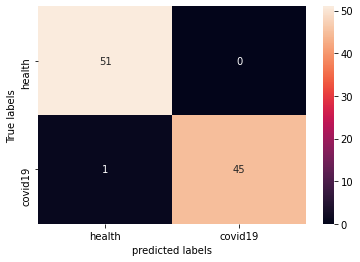

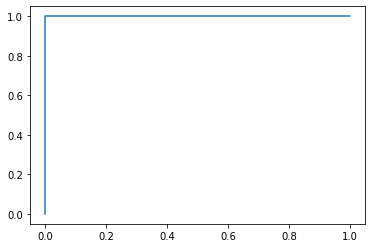

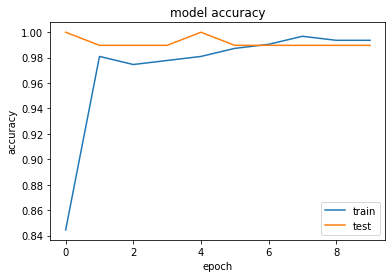

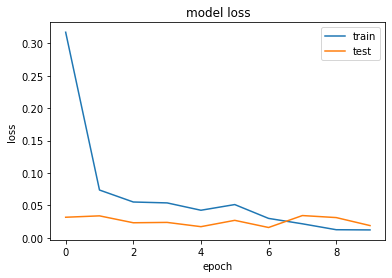

In [ ]:
from tensorflow.keras.applications import ResNet152V2
baseModel = ResNet152V2(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in baseModel.layers:
  layer.trainable = False

import tensorflow as tf

headModel = tf.keras.layers.GlobalAveragePooling2D()(baseModel.output)
headModel = tf.keras.layers.Dense(64, activation="relu")(headModel)
headModel = tf.keras.layers.Dropout(0.5)(headModel)
headModel = tf.keras.layers.Dense(1, activation="sigmoid")(headModel)
model = tf.keras.models.Model(inputs=baseModel.input, outputs=headModel)
model.summary()

EPOCHS = 10
BS = 16
monitor= tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-3, patience=2,restore_best_weights=True)
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
hist3=model.fit(x=x_train,y=y_train,batch_size=BS,epochs=EPOCHS,validation_data=(x_test,y_test),callbacks=[monitor])

import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

Y_pred= model.predict(x_test)
Y_pred_list=[]
for i in range(len(Y_pred)):
  if Y_pred[i,0]>0.5:
    Y_pred_list.append(1)
  else:
    Y_pred_list.append(0)
Y_true_list= list(y_test)
CM = metrics.confusion_matrix(Y_true_list,Y_pred_list)
ax = plt.subplot()
sns.heatmap(CM, annot=True ,ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['health','covid19'])
ax.yaxis.set_ticklabels(['health','covid19'])
#plt.figure()
#plt.imshow(CM,interpolation='nearest',cmap=plt.cm.Blues)

from sklearn.metrics import roc_curve,auc
FP , TP , th =roc_curve(Y_true_list,Y_pred)
ROC_Area = auc(FP,TP)

plt.figure()
plt.plot(FP,TP,)

plt.figure()
plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')

plt.figure()
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')

234700800/234698864 [==============================] - 1s 0us/step
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_________________________

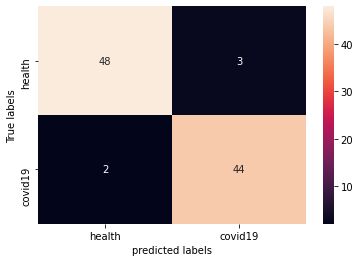

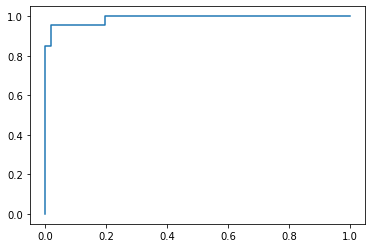

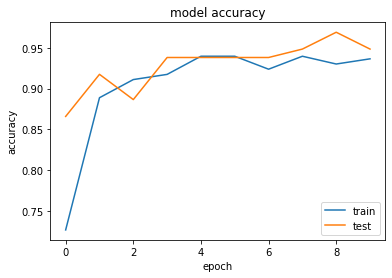

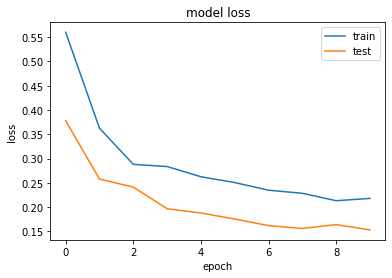

In [ ]:
from tensorflow.keras.applications import ResNet152
baseModel = ResNet152(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in baseModel.layers:
  layer.trainable = False

import tensorflow as tf

headModel = tf.keras.layers.GlobalAveragePooling2D()(baseModel.output)
headModel = tf.keras.layers.Dense(64, activation="relu")(headModel)
headModel = tf.keras.layers.Dropout(0.5)(headModel)
headModel = tf.keras.layers.Dense(1, activation="sigmoid")(headModel)
model = tf.keras.models.Model(inputs=baseModel.input, outputs=headModel)
model.summary()

EPOCHS = 10
BS = 16
monitor= tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-3, patience=2,restore_best_weights=True)
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
hist4=model.fit(x=x_train,y=y_train,batch_size=BS,epochs=EPOCHS,validation_data=(x_test,y_test),callbacks=[monitor])

import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

Y_pred= model.predict(x_test)
Y_pred_list=[]
for i in range(len(Y_pred)):
  if Y_pred[i,0]>0.5:
    Y_pred_list.append(1)
  else:
    Y_pred_list.append(0)
Y_true_list= list(y_test)
CM = metrics.confusion_matrix(Y_true_list,Y_pred_list)
ax = plt.subplot()
sns.heatmap(CM, annot=True ,ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['health','covid19'])
ax.yaxis.set_ticklabels(['health','covid19'])
#plt.figure()
#plt.imshow(CM,interpolation='nearest',cmap=plt.cm.Blues)

from sklearn.metrics import roc_curve,auc
FP , TP , th =roc_curve(Y_true_list,Y_pred)
ROC_Area = auc(FP,TP)

plt.figure()
plt.plot(FP,TP,)

plt.figure()
plt.plot(hist4.history['accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')

plt.figure()
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')

171319296/171317808 [==============================] - 1s 0us/step
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________

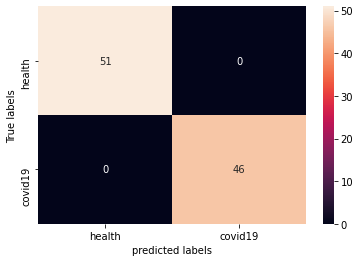

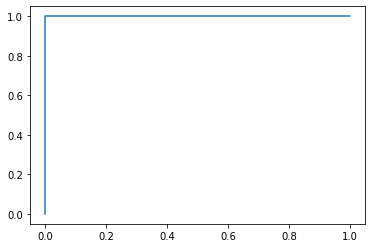

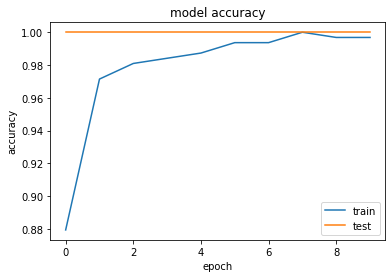

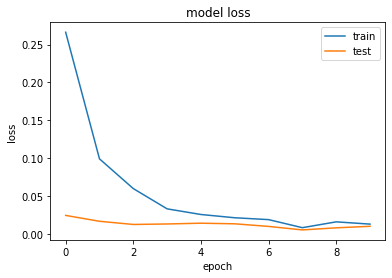

In [ ]:
from tensorflow.keras.applications import ResNet101V2
baseModel = ResNet101V2(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in baseModel.layers:
  layer.trainable = False

import tensorflow as tf

headModel = tf.keras.layers.GlobalAveragePooling2D()(baseModel.output)
headModel = tf.keras.layers.Dense(64, activation="relu")(headModel)
headModel = tf.keras.layers.Dropout(0.5)(headModel)
headModel = tf.keras.layers.Dense(1, activation="sigmoid")(headModel)
model = tf.keras.models.Model(inputs=baseModel.input, outputs=headModel)
model.summary()

EPOCHS = 10
BS = 16
monitor= tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-3, patience=2,restore_best_weights=True)
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
hist5=model.fit(x=x_train,y=y_train,batch_size=BS,epochs=EPOCHS,validation_data=(x_test,y_test),callbacks=[monitor])

import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

Y_pred= model.predict(x_test)
Y_pred_list=[]
for i in range(len(Y_pred)):
  if Y_pred[i,0]>0.5:
    Y_pred_list.append(1)
  else:
    Y_pred_list.append(0)
Y_true_list= list(y_test)
CM = metrics.confusion_matrix(Y_true_list,Y_pred_list)
ax = plt.subplot()
sns.heatmap(CM, annot=True ,ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['health','covid19'])
ax.yaxis.set_ticklabels(['health','covid19'])
#plt.figure()
#plt.imshow(CM,interpolation='nearest',cmap=plt.cm.Blues)

from sklearn.metrics import roc_curve,auc
FP , TP , th =roc_curve(Y_true_list,Y_pred)
ROC_Area = auc(FP,TP)

plt.figure()
plt.plot(FP,TP,)

plt.figure()
plt.plot(hist5.history['accuracy'])
plt.plot(hist5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')

plt.figure()
plt.plot(hist5.history['loss'])
plt.plot(hist5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')

171450368/171446536 [==============================] - 1s 0us/step
Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_________________________

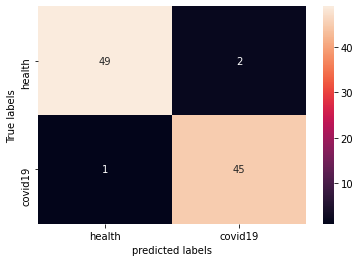

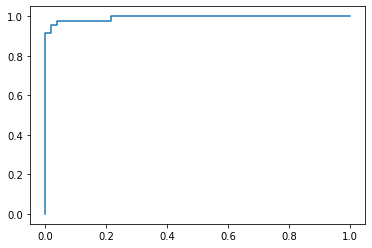

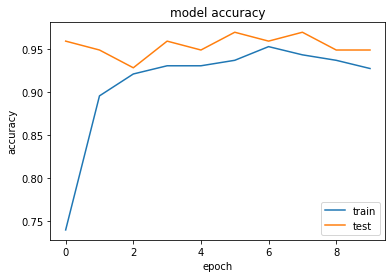

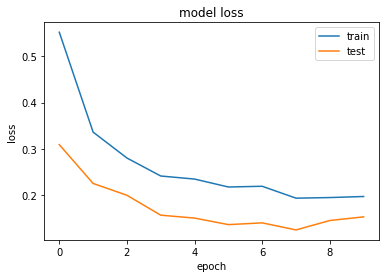

In [ ]:
from tensorflow.keras.applications import ResNet101
baseModel = ResNet101(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in baseModel.layers:
  layer.trainable = False

import tensorflow as tf

headModel = tf.keras.layers.GlobalAveragePooling2D()(baseModel.output)
headModel = tf.keras.layers.Dense(64, activation="relu")(headModel)
headModel = tf.keras.layers.Dropout(0.5)(headModel)
headModel = tf.keras.layers.Dense(1, activation="sigmoid")(headModel)
model = tf.keras.models.Model(inputs=baseModel.input, outputs=headModel)
model.summary()

EPOCHS = 10
BS = 16
monitor= tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-3, patience=2,restore_best_weights=True)
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
hist6=model.fit(x=x_train,y=y_train,batch_size=BS,epochs=EPOCHS,validation_data=(x_test,y_test),callbacks=[monitor])

import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

Y_pred= model.predict(x_test)
Y_pred_list=[]
for i in range(len(Y_pred)):
  if Y_pred[i,0]>0.5:
    Y_pred_list.append(1)
  else:
    Y_pred_list.append(0)
Y_true_list= list(y_test)
CM = metrics.confusion_matrix(Y_true_list,Y_pred_list)
ax = plt.subplot()
sns.heatmap(CM, annot=True ,ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['health','covid19'])
ax.yaxis.set_ticklabels(['health','covid19'])
#plt.figure()
#plt.imshow(CM,interpolation='nearest',cmap=plt.cm.Blues)

from sklearn.metrics import roc_curve,auc
FP , TP , th =roc_curve(Y_true_list,Y_pred)
ROC_Area = auc(FP,TP)

plt.figure()
plt.plot(FP,TP,)

plt.figure()
plt.plot(hist6.history['accuracy'])
plt.plot(hist6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')

plt.figure()
plt.plot(hist6.history['loss'])
plt.plot(hist6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')

94674944/94668760 [==============================] - 1s 0us/step
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
___________________________

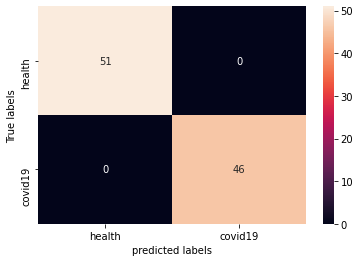

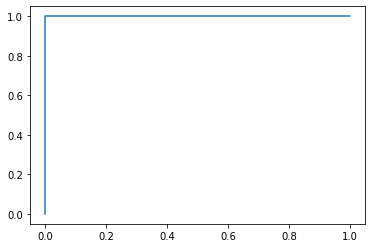

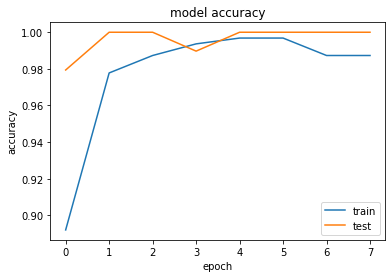

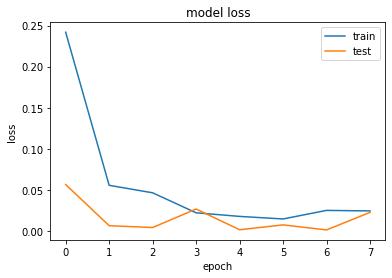

In [ ]:
from tensorflow.keras.applications import ResNet50V2
baseModel = ResNet50V2(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in baseModel.layers:
  layer.trainable = False

import tensorflow as tf

headModel = tf.keras.layers.GlobalAveragePooling2D()(baseModel.output)
headModel = tf.keras.layers.Dense(64, activation="relu")(headModel)
headModel = tf.keras.layers.Dropout(0.5)(headModel)
headModel = tf.keras.layers.Dense(1, activation="sigmoid")(headModel)
model = tf.keras.models.Model(inputs=baseModel.input, outputs=headModel)
model.summary()

EPOCHS = 10
BS = 16
monitor= tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-3, patience=2,restore_best_weights=True)
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
hist7=model.fit(x=x_train,y=y_train,batch_size=BS,epochs=EPOCHS,validation_data=(x_test,y_test),callbacks=[monitor])

import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

Y_pred= model.predict(x_test)
Y_pred_list=[]
for i in range(len(Y_pred)):
  if Y_pred[i,0]>0.5:
    Y_pred_list.append(1)
  else:
    Y_pred_list.append(0)
Y_true_list= list(y_test)
CM = metrics.confusion_matrix(Y_true_list,Y_pred_list)
ax = plt.subplot()
sns.heatmap(CM, annot=True ,ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['health','covid19'])
ax.yaxis.set_ticklabels(['health','covid19'])
#plt.figure()
#plt.imshow(CM,interpolation='nearest',cmap=plt.cm.Blues)

from sklearn.metrics import roc_curve,auc
FP , TP , th =roc_curve(Y_true_list,Y_pred)
ROC_Area = auc(FP,TP)

plt.figure()
plt.plot(FP,TP,)

plt.figure()
plt.plot(hist7.history['accuracy'])
plt.plot(hist7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')

plt.figure()
plt.plot(hist7.history['loss'])
plt.plot(hist7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')

94773248/94765736 [==============================] - 1s 0us/step
Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________

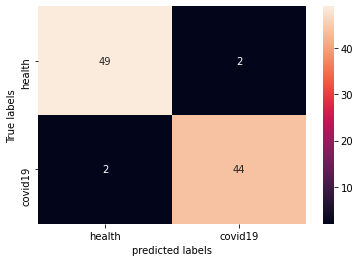

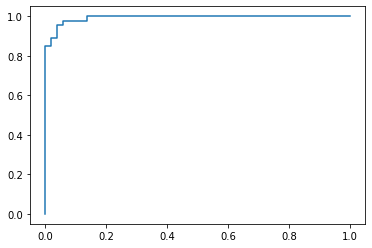

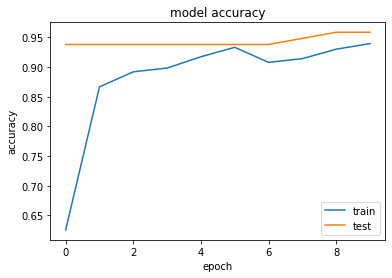

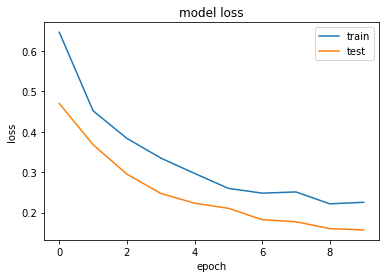

In [ ]:
from tensorflow.keras.applications import ResNet50
baseModel = ResNet50(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in baseModel.layers:
  layer.trainable = False

import tensorflow as tf

headModel = tf.keras.layers.GlobalAveragePooling2D()(baseModel.output)
headModel = tf.keras.layers.Dense(64, activation="relu")(headModel)
headModel = tf.keras.layers.Dropout(0.5)(headModel)
headModel = tf.keras.layers.Dense(1, activation="sigmoid")(headModel)
model = tf.keras.models.Model(inputs=baseModel.input, outputs=headModel)
model.summary()

EPOCHS = 10
BS = 16
monitor= tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-3, patience=2,restore_best_weights=True)
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
hist8=model.fit(x=x_train,y=y_train,batch_size=BS,epochs=EPOCHS,validation_data=(x_test,y_test),callbacks=[monitor])

import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

Y_pred= model.predict(x_test)
Y_pred_list=[]
for i in range(len(Y_pred)):
  if Y_pred[i,0]>0.5:
    Y_pred_list.append(1)
  else:
    Y_pred_list.append(0)
Y_true_list= list(y_test)
CM = metrics.confusion_matrix(Y_true_list,Y_pred_list)
ax = plt.subplot()
sns.heatmap(CM, annot=True ,ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['health','covid19'])
ax.yaxis.set_ticklabels(['health','covid19'])
#plt.figure()
#plt.imshow(CM,interpolation='nearest',cmap=plt.cm.Blues)

from sklearn.metrics import roc_curve,auc
FP , TP , th =roc_curve(Y_true_list,Y_pred)
ROC_Area = auc(FP,TP)

plt.figure()
plt.plot(FP,TP,)

plt.figure()
plt.plot(hist8.history['accuracy'])
plt.plot(hist8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')

plt.figure()
plt.plot(hist8.history['loss'])
plt.plot(hist8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')

29089792/29084464 [==============================] - 1s 0us/step
Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_11[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
___________________________

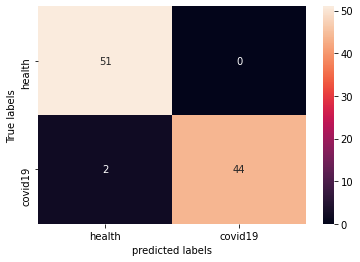

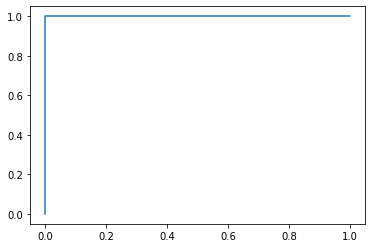

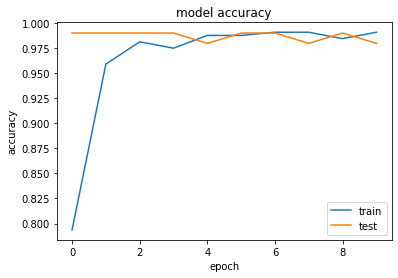

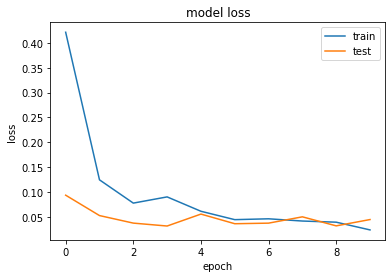

In [ ]:
from tensorflow.keras.applications import DenseNet121
baseModel = DenseNet121(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in baseModel.layers:
  layer.trainable = False

import tensorflow as tf

headModel = tf.keras.layers.GlobalAveragePooling2D()(baseModel.output)
headModel = tf.keras.layers.Dense(64, activation="relu")(headModel)
headModel = tf.keras.layers.Dropout(0.5)(headModel)
headModel = tf.keras.layers.Dense(1, activation="sigmoid")(headModel)
model = tf.keras.models.Model(inputs=baseModel.input, outputs=headModel)
model.summary()

EPOCHS = 10
BS = 16
monitor= tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-3, patience=2,restore_best_weights=True)
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
hist9=model.fit(x=x_train,y=y_train,batch_size=BS,epochs=EPOCHS,validation_data=(x_test,y_test),callbacks=[monitor])

import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

Y_pred= model.predict(x_test)
Y_pred_list=[]
for i in range(len(Y_pred)):
  if Y_pred[i,0]>0.5:
    Y_pred_list.append(1)
  else:
    Y_pred_list.append(0)
Y_true_list= list(y_test)
CM = metrics.confusion_matrix(Y_true_list,Y_pred_list)
ax = plt.subplot()
sns.heatmap(CM, annot=True ,ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['health','covid19'])
ax.yaxis.set_ticklabels(['health','covid19'])
#plt.figure()
#plt.imshow(CM,interpolation='nearest',cmap=plt.cm.Blues)

from sklearn.metrics import roc_curve,auc
FP , TP , th =roc_curve(Y_true_list,Y_pred)
ROC_Area = auc(FP,TP)

plt.figure()
plt.plot(FP,TP,)

plt.figure()
plt.plot(hist9.history['accuracy'])
plt.plot(hist9.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')

plt.figure()
plt.plot(hist9.history['loss'])
plt.plot(hist9.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')

51879936/51877672 [==============================] - 1s 0us/step
Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 230, 230, 3)  0           input_12[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
__________________________

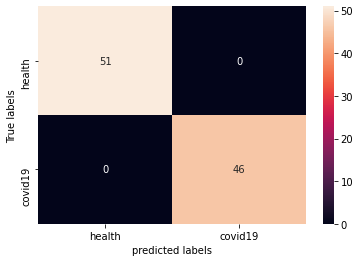

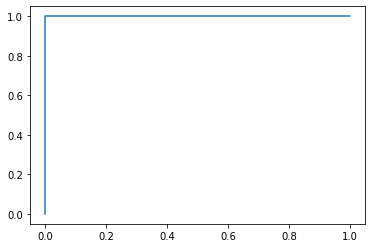

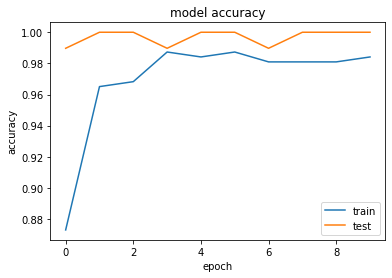

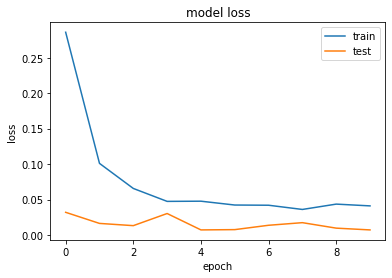

In [ ]:
from tensorflow.keras.applications import DenseNet169
baseModel = DenseNet169(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in baseModel.layers:
  layer.trainable = False

import tensorflow as tf

headModel = tf.keras.layers.GlobalAveragePooling2D()(baseModel.output)
headModel = tf.keras.layers.Dense(64, activation="relu")(headModel)
headModel = tf.keras.layers.Dropout(0.5)(headModel)
headModel = tf.keras.layers.Dense(1, activation="sigmoid")(headModel)
model = tf.keras.models.Model(inputs=baseModel.input, outputs=headModel)
model.summary()

EPOCHS = 10
BS = 16
monitor= tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-3, patience=2,restore_best_weights=True)
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
hist10=model.fit(x=x_train,y=y_train,batch_size=BS,epochs=EPOCHS,validation_data=(x_test,y_test),callbacks=[monitor])

import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

Y_pred= model.predict(x_test)
Y_pred_list=[]
for i in range(len(Y_pred)):
  if Y_pred[i,0]>0.5:
    Y_pred_list.append(1)
  else:
    Y_pred_list.append(0)
Y_true_list= list(y_test)
CM = metrics.confusion_matrix(Y_true_list,Y_pred_list)
ax = plt.subplot()
sns.heatmap(CM, annot=True ,ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['health','covid19'])
ax.yaxis.set_ticklabels(['health','covid19'])
#plt.figure()
#plt.imshow(CM,interpolation='nearest',cmap=plt.cm.Blues)

from sklearn.metrics import roc_curve,auc
FP , TP , th =roc_curve(Y_true_list,Y_pred)
ROC_Area = auc(FP,TP)

plt.figure()
plt.plot(FP,TP,)

plt.figure()
plt.plot(hist10.history['accuracy'])
plt.plot(hist10.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')

plt.figure()
plt.plot(hist10.history['loss'])
plt.plot(hist10.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')

74842112/74836368 [==============================] - 0s 0us/step
Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, 230, 230, 3)  0           input_13[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
__________________________

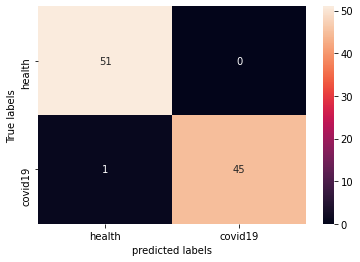

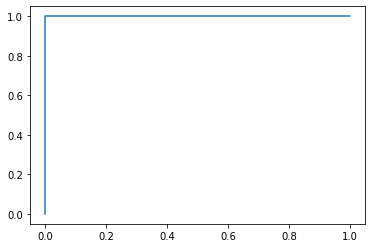

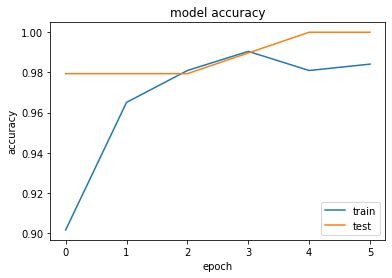

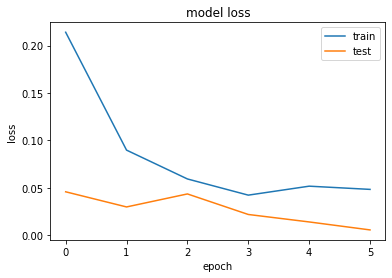

In [ ]:
from tensorflow.keras.applications import DenseNet201
baseModel = DenseNet201(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in baseModel.layers:
  layer.trainable = False

import tensorflow as tf

headModel = tf.keras.layers.GlobalAveragePooling2D()(baseModel.output)
headModel = tf.keras.layers.Dense(64, activation="relu")(headModel)
headModel = tf.keras.layers.Dropout(0.5)(headModel)
headModel = tf.keras.layers.Dense(1, activation="sigmoid")(headModel)
model = tf.keras.models.Model(inputs=baseModel.input, outputs=headModel)
model.summary()

EPOCHS = 10
BS = 16
monitor= tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-3, patience=2,restore_best_weights=True)
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
hist11=model.fit(x=x_train,y=y_train,batch_size=BS,epochs=EPOCHS,validation_data=(x_test,y_test),callbacks=[monitor])

import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

Y_pred= model.predict(x_test)
Y_pred_list=[]
for i in range(len(Y_pred)):
  if Y_pred[i,0]>0.5:
    Y_pred_list.append(1)
  else:
    Y_pred_list.append(0)
Y_true_list= list(y_test)
CM = metrics.confusion_matrix(Y_true_list,Y_pred_list)
ax = plt.subplot()
sns.heatmap(CM, annot=True ,ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['health','covid19'])
ax.yaxis.set_ticklabels(['health','covid19'])
#plt.figure()
#plt.imshow(CM,interpolation='nearest',cmap=plt.cm.Blues)

from sklearn.metrics import roc_curve,auc
FP , TP , th =roc_curve(Y_true_list,Y_pred)
ROC_Area = auc(FP,TP)

plt.figure()
plt.plot(FP,TP,)

plt.figure()
plt.plot(hist11.history['accuracy'])
plt.plot(hist11.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')

plt.figure()
plt.plot(hist11.history['loss'])
plt.plot(hist11.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')

219062272/219055592 [==============================] - 2s 0us/step
Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_14[0][0]                   
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
________________________

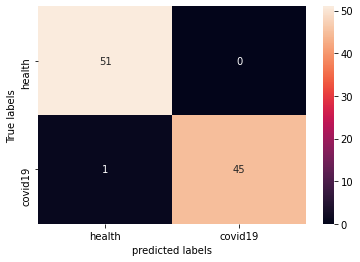

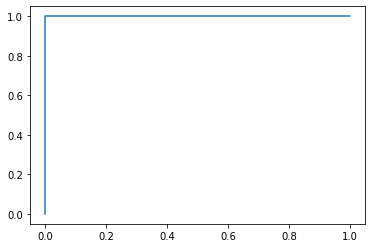

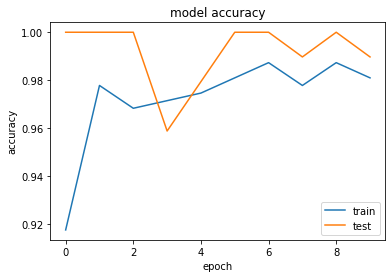

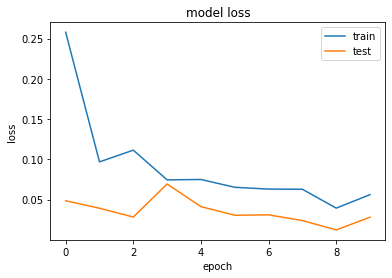

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
baseModel = InceptionResNetV2(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in baseModel.layers:
  layer.trainable = False

import tensorflow as tf

headModel = tf.keras.layers.GlobalAveragePooling2D()(baseModel.output)
headModel = tf.keras.layers.Dense(64, activation="relu")(headModel)
headModel = tf.keras.layers.Dropout(0.5)(headModel)
headModel = tf.keras.layers.Dense(1, activation="sigmoid")(headModel)
model = tf.keras.models.Model(inputs=baseModel.input, outputs=headModel)
model.summary()

EPOCHS = 10
BS = 16
monitor= tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-3, patience=2,restore_best_weights=True)
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
hist12=model.fit(x=x_train,y=y_train,batch_size=BS,epochs=EPOCHS,validation_data=(x_test,y_test),callbacks=[monitor])

import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

Y_pred= model.predict(x_test)
Y_pred_list=[]
for i in range(len(Y_pred)):
  if Y_pred[i,0]>0.5:
    Y_pred_list.append(1)
  else:
    Y_pred_list.append(0)
Y_true_list= list(y_test)
CM = metrics.confusion_matrix(Y_true_list,Y_pred_list)
ax = plt.subplot()
sns.heatmap(CM, annot=True ,ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['health','covid19'])
ax.yaxis.set_ticklabels(['health','covid19'])
#plt.figure()
#plt.imshow(CM,interpolation='nearest',cmap=plt.cm.Blues)

from sklearn.metrics import roc_curve,auc
FP , TP , th =roc_curve(Y_true_list,Y_pred)
ROC_Area = auc(FP,TP)

plt.figure()
plt.plot(FP,TP,)

plt.figure()
plt.plot(hist12.history['accuracy'])
plt.plot(hist12.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')

plt.figure()
plt.plot(hist12.history['loss'])
plt.plot(hist12.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')

87916544/87910968 [==============================] - 1s 0us/step
Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 111, 111, 32) 864         input_15[0][0]                   
__________________________________________________________________________________________________
batch_normalization_203 (BatchN (None, 111, 111, 32) 96          conv2d_203[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 111, 111, 32) 0           batch_normalization_203[0][0]    
__________________________

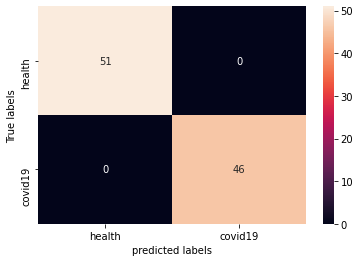

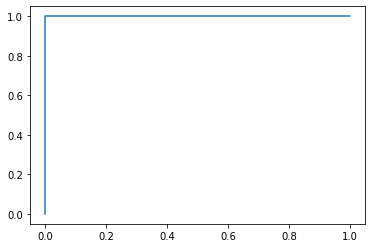

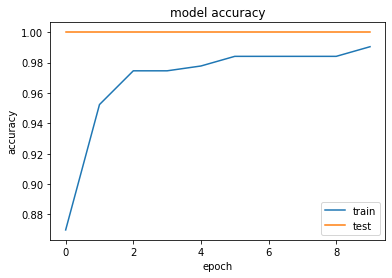

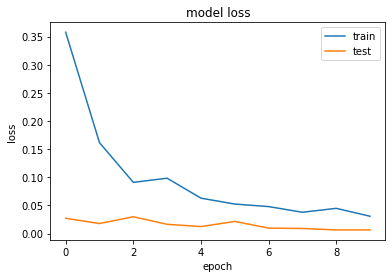

In [ ]:
from tensorflow.keras.applications import InceptionV3
baseModel = InceptionV3(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in baseModel.layers:
  layer.trainable = False

import tensorflow as tf

headModel = tf.keras.layers.GlobalAveragePooling2D()(baseModel.output)
headModel = tf.keras.layers.Dense(64, activation="relu")(headModel)
headModel = tf.keras.layers.Dropout(0.5)(headModel)
headModel = tf.keras.layers.Dense(1, activation="sigmoid")(headModel)
model = tf.keras.models.Model(inputs=baseModel.input, outputs=headModel)
model.summary()

EPOCHS = 10
BS = 16
monitor= tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-3, patience=2,restore_best_weights=True)
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
hist13=model.fit(x=x_train,y=y_train,batch_size=BS,epochs=EPOCHS,validation_data=(x_test,y_test),callbacks=[monitor])

import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

Y_pred= model.predict(x_test)
Y_pred_list=[]
for i in range(len(Y_pred)):
  if Y_pred[i,0]>0.5:
    Y_pred_list.append(1)
  else:
    Y_pred_list.append(0)
Y_true_list= list(y_test)
CM = metrics.confusion_matrix(Y_true_list,Y_pred_list)
ax = plt.subplot()
sns.heatmap(CM, annot=True ,ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['health','covid19'])
ax.yaxis.set_ticklabels(['health','covid19'])
#plt.figure()
#plt.imshow(CM,interpolation='nearest',cmap=plt.cm.Blues)

from sklearn.metrics import roc_curve,auc
FP , TP , th =roc_curve(Y_true_list,Y_pred)
ROC_Area = auc(FP,TP)

plt.figure()
plt.plot(FP,TP,)

plt.figure()
plt.plot(hist13.history['accuracy'])
plt.plot(hist13.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')

plt.figure()
plt.plot(hist13.history['loss'])
plt.plot(hist13.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')

17227776/17225924 [==============================] - 0s 0us/step
Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
___________________________________________________________

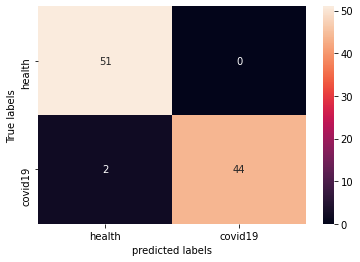

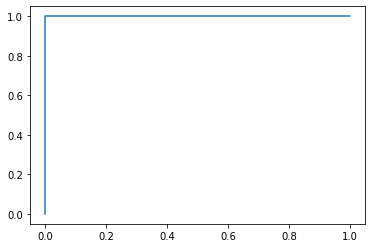

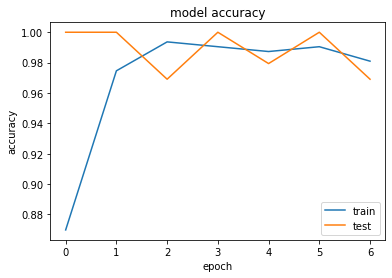

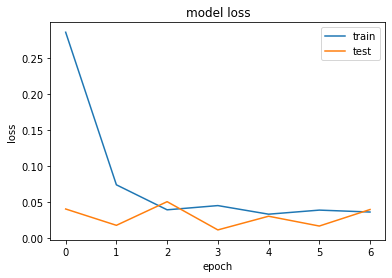

In [ ]:
from tensorflow.keras.applications import MobileNet
baseModel = MobileNet(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in baseModel.layers:
  layer.trainable = False

import tensorflow as tf

headModel = tf.keras.layers.GlobalAveragePooling2D()(baseModel.output)
headModel = tf.keras.layers.Dense(64, activation="relu")(headModel)
headModel = tf.keras.layers.Dropout(0.5)(headModel)
headModel = tf.keras.layers.Dense(1, activation="sigmoid")(headModel)
model = tf.keras.models.Model(inputs=baseModel.input, outputs=headModel)
model.summary()

EPOCHS = 10
BS = 16
monitor= tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-3, patience=2,restore_best_weights=True)
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
hist14=model.fit(x=x_train,y=y_train,batch_size=BS,epochs=EPOCHS,validation_data=(x_test,y_test),callbacks=[monitor])

import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

Y_pred= model.predict(x_test)
Y_pred_list=[]
for i in range(len(Y_pred)):
  if Y_pred[i,0]>0.5:
    Y_pred_list.append(1)
  else:
    Y_pred_list.append(0)
Y_true_list= list(y_test)
CM = metrics.confusion_matrix(Y_true_list,Y_pred_list)
ax = plt.subplot()
sns.heatmap(CM, annot=True ,ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['health','covid19'])
ax.yaxis.set_ticklabels(['health','covid19'])
#plt.figure()
#plt.imshow(CM,interpolation='nearest',cmap=plt.cm.Blues)

from sklearn.metrics import roc_curve,auc
FP , TP , th =roc_curve(Y_true_list,Y_pred)
ROC_Area = auc(FP,TP)

plt.figure()
plt.plot(FP,TP,)

plt.figure()
plt.plot(hist14.history['accuracy'])
plt.plot(hist14.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')

plt.figure()
plt.plot(hist14.history['loss'])
plt.plot(hist14.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')

9412608/9406464 [==============================] - 0s 0us/step
Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_17[0][0]                   
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________

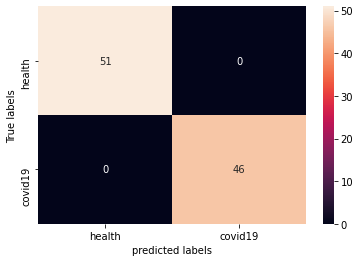

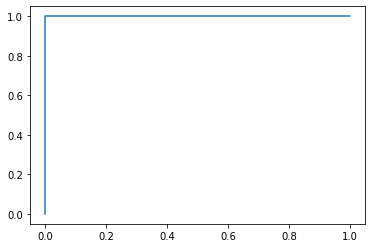

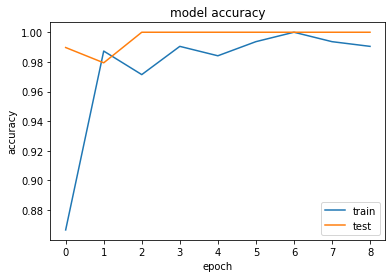

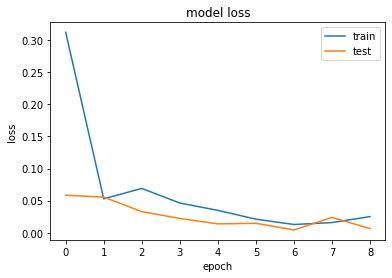

In [ ]:
from tensorflow.keras.applications import MobileNetV2
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in baseModel.layers:
  layer.trainable = False

import tensorflow as tf

headModel = tf.keras.layers.GlobalAveragePooling2D()(baseModel.output)
headModel = tf.keras.layers.Dense(64, activation="relu")(headModel)
headModel = tf.keras.layers.Dropout(0.5)(headModel)
headModel = tf.keras.layers.Dense(1, activation="sigmoid")(headModel)
model = tf.keras.models.Model(inputs=baseModel.input, outputs=headModel)
model.summary()

EPOCHS = 10
BS = 16
monitor= tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-3, patience=2,restore_best_weights=True)
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
hist15=model.fit(x=x_train,y=y_train,batch_size=BS,epochs=EPOCHS,validation_data=(x_test,y_test),callbacks=[monitor])

import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

Y_pred= model.predict(x_test)
Y_pred_list=[]
for i in range(len(Y_pred)):
  if Y_pred[i,0]>0.5:
    Y_pred_list.append(1)
  else:
    Y_pred_list.append(0)
Y_true_list= list(y_test)
CM = metrics.confusion_matrix(Y_true_list,Y_pred_list)
ax = plt.subplot()
sns.heatmap(CM, annot=True ,ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['health','covid19'])
ax.yaxis.set_ticklabels(['health','covid19'])
#plt.figure()
#plt.imshow(CM,interpolation='nearest',cmap=plt.cm.Blues)

from sklearn.metrics import roc_curve,auc
FP , TP , th =roc_curve(Y_true_list,Y_pred)
ROC_Area = auc(FP,TP)

plt.figure()
plt.plot(FP,TP,)

plt.figure()
plt.plot(hist15.history['accuracy'])
plt.plot(hist15.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')

plt.figure()
plt.plot(hist15.history['loss'])
plt.plot(hist15.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')

6701056/6698480 [==============================] - 0s 0us/step
Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_18[0][0]                   
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling[0][0]                  
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
____________________________

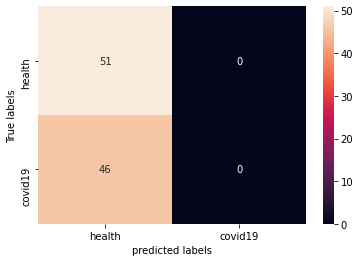

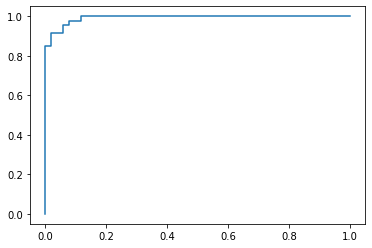

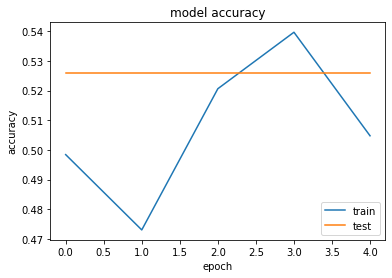

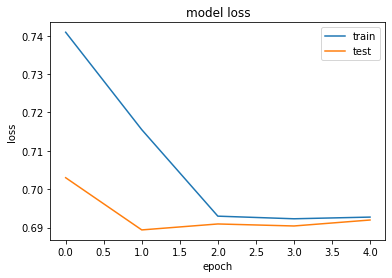

In [ ]:
from tensorflow.keras.applications import MobileNetV3Small
baseModel = MobileNetV3Small(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in baseModel.layers:
  layer.trainable = False

import tensorflow as tf

headModel = tf.keras.layers.GlobalAveragePooling2D()(baseModel.output)
headModel = tf.keras.layers.Dense(64, activation="relu")(headModel)
headModel = tf.keras.layers.Dropout(0.5)(headModel)
headModel = tf.keras.layers.Dense(1, activation="sigmoid")(headModel)
model = tf.keras.models.Model(inputs=baseModel.input, outputs=headModel)
model.summary()

EPOCHS = 10
BS = 16
monitor= tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-3, patience=2,restore_best_weights=True)
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
hist16=model.fit(x=x_train,y=y_train,batch_size=BS,epochs=EPOCHS,validation_data=(x_test,y_test),callbacks=[monitor])

import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

Y_pred= model.predict(x_test)
Y_pred_list=[]
for i in range(len(Y_pred)):
  if Y_pred[i,0]>0.5:
    Y_pred_list.append(1)
  else:
    Y_pred_list.append(0)
Y_true_list= list(y_test)
CM = metrics.confusion_matrix(Y_true_list,Y_pred_list)
ax = plt.subplot()
sns.heatmap(CM, annot=True ,ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['health','covid19'])
ax.yaxis.set_ticklabels(['health','covid19'])
#plt.figure()
#plt.imshow(CM,interpolation='nearest',cmap=plt.cm.Blues)

from sklearn.metrics import roc_curve,auc
FP , TP , th =roc_curve(Y_true_list,Y_pred)
ROC_Area = auc(FP,TP)

plt.figure()
plt.plot(FP,TP,)

plt.figure()
plt.plot(hist16.history['accuracy'])
plt.plot(hist16.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')

plt.figure()
plt.plot(hist16.history['loss'])
plt.plot(hist16.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')

17612800/17605208 [==============================] - 0s 0us/step
Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           input_19[0][0]                   
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling_1[0][0]                
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
__________________________

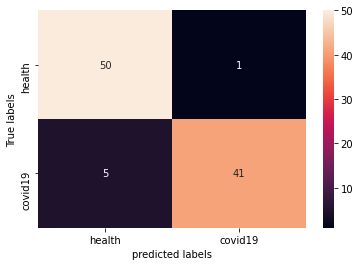

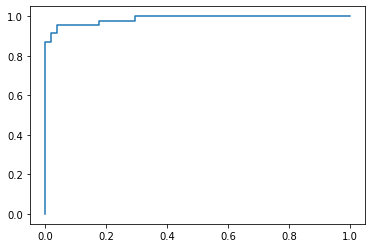

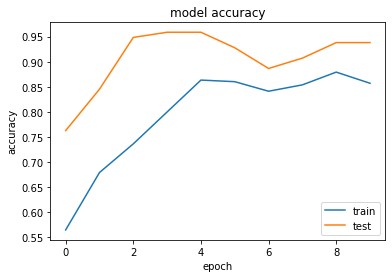

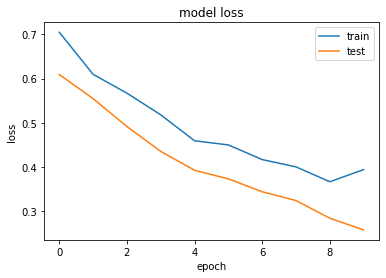

In [ ]:
from tensorflow.keras.applications import MobileNetV3Large
baseModel = MobileNetV3Large(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in baseModel.layers:
  layer.trainable = False

import tensorflow as tf

headModel = tf.keras.layers.GlobalAveragePooling2D()(baseModel.output)
headModel = tf.keras.layers.Dense(64, activation="relu")(headModel)
headModel = tf.keras.layers.Dropout(0.5)(headModel)
headModel = tf.keras.layers.Dense(1, activation="sigmoid")(headModel)
model = tf.keras.models.Model(inputs=baseModel.input, outputs=headModel)
model.summary()

EPOCHS = 10
BS = 16
monitor= tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-3, patience=2,restore_best_weights=True)
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
hist17=model.fit(x=x_train,y=y_train,batch_size=BS,epochs=EPOCHS,validation_data=(x_test,y_test),callbacks=[monitor])

import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

Y_pred= model.predict(x_test)
Y_pred_list=[]
for i in range(len(Y_pred)):
  if Y_pred[i,0]>0.5:
    Y_pred_list.append(1)
  else:
    Y_pred_list.append(0)
Y_true_list= list(y_test)
CM = metrics.confusion_matrix(Y_true_list,Y_pred_list)
ax = plt.subplot()
sns.heatmap(CM, annot=True ,ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['health','covid19'])
ax.yaxis.set_ticklabels(['health','covid19'])
#plt.figure()
#plt.imshow(CM,interpolation='nearest',cmap=plt.cm.Blues)

from sklearn.metrics import roc_curve,auc
FP , TP , th =roc_curve(Y_true_list,Y_pred)
ROC_Area = auc(FP,TP)

plt.figure()
plt.plot(FP,TP,)

plt.figure()
plt.plot(hist17.history['accuracy'])
plt.plot(hist17.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')

plt.figure()
plt.plot(hist17.history['loss'])
plt.plot(hist17.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')

19996672/19993432 [==============================] - 0s 0us/step
Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 32) 864         input_20[0][0]                   
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 32) 128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_297 (Activation)     (None, 111, 111, 32) 0           stem_bn1[0][0]                   
__________________________

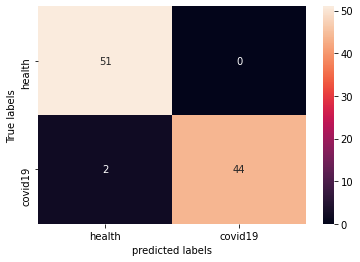

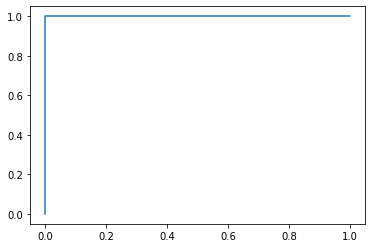

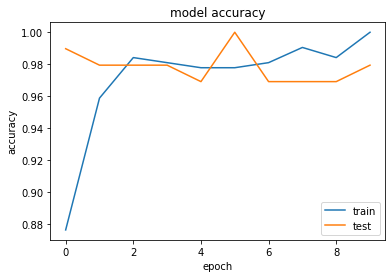

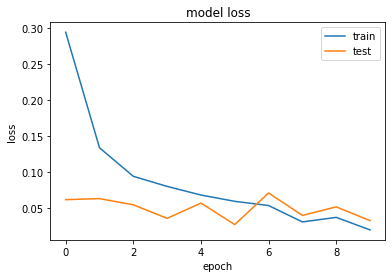

In [ ]:
from tensorflow.keras.applications import NASNetMobile
baseModel = NASNetMobile(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in baseModel.layers:
  layer.trainable = False

import tensorflow as tf

headModel = tf.keras.layers.GlobalAveragePooling2D()(baseModel.output)
headModel = tf.keras.layers.Dense(64, activation="relu")(headModel)
headModel = tf.keras.layers.Dropout(0.5)(headModel)
headModel = tf.keras.layers.Dense(1, activation="sigmoid")(headModel)
model = tf.keras.models.Model(inputs=baseModel.input, outputs=headModel)
model.summary()

EPOCHS = 10
BS = 16
monitor= tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-3, patience=2,restore_best_weights=True)
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
hist18=model.fit(x=x_train,y=y_train,batch_size=BS,epochs=EPOCHS,validation_data=(x_test,y_test),callbacks=[monitor])

import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

Y_pred= model.predict(x_test)
Y_pred_list=[]
for i in range(len(Y_pred)):
  if Y_pred[i,0]>0.5:
    Y_pred_list.append(1)
  else:
    Y_pred_list.append(0)
Y_true_list= list(y_test)
CM = metrics.confusion_matrix(Y_true_list,Y_pred_list)
ax = plt.subplot()
sns.heatmap(CM, annot=True ,ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['health','covid19'])
ax.yaxis.set_ticklabels(['health','covid19'])
#plt.figure()
#plt.imshow(CM,interpolation='nearest',cmap=plt.cm.Blues)

from sklearn.metrics import roc_curve,auc
FP , TP , th =roc_curve(Y_true_list,Y_pred)
ROC_Area = auc(FP,TP)

plt.figure()
plt.plot(FP,TP,)

plt.figure()
plt.plot(hist18.history['accuracy'])
plt.plot(hist18.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')

plt.figure()
plt.plot(hist18.history['loss'])
plt.plot(hist18.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')

165240832/165234480 [==============================] - 2s 0us/step
Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, 224, 224, 3)  0           input_21[0][0]                   
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling_2[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
________________________

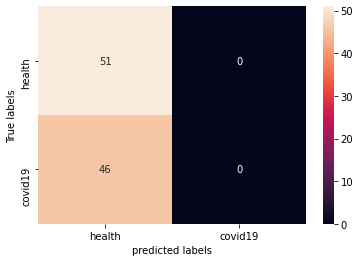

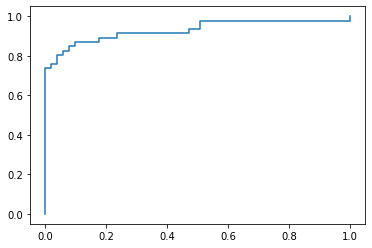

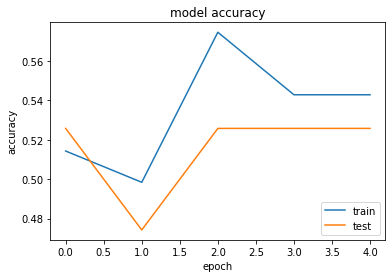

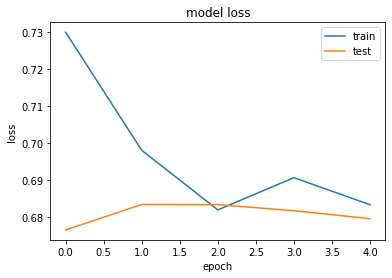

In [ ]:
from tensorflow.keras.applications import EfficientNetB6
baseModel = EfficientNetB6(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in baseModel.layers:
  layer.trainable = False

import tensorflow as tf

headModel = tf.keras.layers.GlobalAveragePooling2D()(baseModel.output)
headModel = tf.keras.layers.Dense(64, activation="relu")(headModel)
headModel = tf.keras.layers.Dropout(0.5)(headModel)
headModel = tf.keras.layers.Dense(1, activation="sigmoid")(headModel)
model = tf.keras.models.Model(inputs=baseModel.input, outputs=headModel)
model.summary()

EPOCHS = 10
BS = 16
monitor= tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-3, patience=2,restore_best_weights=True)
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
hist19=model.fit(x=x_train,y=y_train,batch_size=BS,epochs=EPOCHS,validation_data=(x_test,y_test),callbacks=[monitor])

import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

Y_pred= model.predict(x_test)
Y_pred_list=[]
for i in range(len(Y_pred)):
  if Y_pred[i,0]>0.5:
    Y_pred_list.append(1)
  else:
    Y_pred_list.append(0)
Y_true_list= list(y_test)
CM = metrics.confusion_matrix(Y_true_list,Y_pred_list)
ax = plt.subplot()
sns.heatmap(CM, annot=True ,ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['health','covid19'])
ax.yaxis.set_ticklabels(['health','covid19'])
#plt.figure()
#plt.imshow(CM,interpolation='nearest',cmap=plt.cm.Blues)

from sklearn.metrics import roc_curve,auc
FP , TP , th =roc_curve(Y_true_list,Y_pred)
ROC_Area = auc(FP,TP)

plt.figure()
plt.plot(FP,TP,)

plt.figure()
plt.plot(hist19.history['accuracy'])
plt.plot(hist19.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')

plt.figure()
plt.plot(hist19.history['loss'])
plt.plot(hist19.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')